<a href="https://colab.research.google.com/github/rajni-arora/Deep-Learning-Projects/blob/main/October_26_Word_Embeddings_%26_Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reading Data & Importing Dependencies**

In [1]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.models import Phrases
from gensim.models.phrases import Phraser

In [3]:
data = pd.read_csv('/content/sample_data/processed_data.csv')
data.head()

Class                                       Cleaned_Text
0   Vaccine Challenges  faints from mild pain by the way a ton of girl...
1   Vaccine Challenges  painislife said not saying that is not the cas...
2  Consumer Experience  goldenwolf87 said i wonder how much more commo...
3  Consumer Experience  travelnomad said hpv herpes can be contracted ...
4  Consumer Experience  louisiana fisher said im sitting there playing...

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18283 entries, 0 to 18282
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Class         18283 non-null  object
 1   Cleaned_Text  18204 non-null  object
dtypes: object(2)
memory usage: 285.8+ KB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18204 entries, 0 to 18282
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Class         18204 non-null  object
 1   Cleaned_Text  18204 non-null  object
dtypes: object(2)
memory usage: 426.7+ KB


In [7]:
sent_of_train=[]
for sent in data["Cleaned_Text"]:
    sent_of_train.append(sent.split())

In [8]:
sent_of_train[:1]

[['faints',
  'from',
  'mild',
  'pain',
  'by',
  'the',
  'way',
  'a',
  'ton',
  'of',
  'girls',
  'pass',
  'out',
  'from',
  'the',
  'hpv',
  'vaccine',
  'as',
  'well']]

# **Custom Embeddings using Gensim**

In [10]:
## Train the genisim word2vec model with our own custom corpus
## Uni-grams

#size: The number of dimensions of the embeddings and the default is 100.
#window: The maximum distance between a target word and words around the target word. The default window is 5.
#min_count: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
#workers: The number of partitions during training and the default workers is 3.
#sg: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.
model = Word2Vec(sent_of_train, min_count=1,size= 50,workers=3, window =3, sg = 1)

In [11]:
model.wv.vocab

{'faints': <gensim.models.keyedvectors.Vocab at 0x7f4f3a417750>,
 'from': <gensim.models.keyedvectors.Vocab at 0x7f4f3a8f0a90>,
 'mild': <gensim.models.keyedvectors.Vocab at 0x7f4f3a8f0ad0>,
 'pain': <gensim.models.keyedvectors.Vocab at 0x7f4f3a426c10>,
 'by': <gensim.models.keyedvectors.Vocab at 0x7f4f3a426510>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7f4f3a426710>,
 'way': <gensim.models.keyedvectors.Vocab at 0x7f4f3a161250>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7f4f3a161210>,
 'ton': <gensim.models.keyedvectors.Vocab at 0x7f4f3a426790>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7f4f3a426d90>,
 'girls': <gensim.models.keyedvectors.Vocab at 0x7f4f3a161a50>,
 'pass': <gensim.models.keyedvectors.Vocab at 0x7f4f3a161a10>,
 'out': <gensim.models.keyedvectors.Vocab at 0x7f4f3a161fd0>,
 'hpv': <gensim.models.keyedvectors.Vocab at 0x7f4f3a161bd0>,
 'vaccine': <gensim.models.keyedvectors.Vocab at 0x7f4f3a161f50>,
 'as': <gensim.models.keyedvectors.Vocab at 0x7f4f3a161990>,


In [12]:
model.most_similar('discomfort')[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('tiny', 0.9458805322647095),
 ('unpleasant', 0.9275389313697815),
 ('slight', 0.9274980425834656),
 ('slightly', 0.9274770617485046),
 ('cramping', 0.9218337535858154),
 ('painful', 0.9204732775688171),
 ('cramps', 0.9203071594238281),
 ('traumatic', 0.9199036359786987),
 ('rough', 0.9183501601219177),
 ('burning', 0.9157804250717163)]

In [13]:
model.most_similar('cancer')[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('cancers', 0.8491388559341431),
 ('penile', 0.8283095955848694),
 ('mouth', 0.8121711611747742),
 ('lung', 0.8067188858985901),
 ('precancer', 0.8036888241767883),
 ('ovarian', 0.7984690070152283),
 ('colon', 0.7976914644241333),
 ('preventing', 0.796800434589386),
 ('various', 0.7967389822006226),
 ('anal', 0.7945507764816284)]

In [14]:
## For Most Similar Bi-grams
bigram = Phrases(sent_of_train, min_count=1, threshold=2)

In [22]:
bigram

In [15]:
model = Word2Vec(bigram[sent_of_train], size=50, min_count=3, iter=20)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [16]:
model.wv.most_similar("smear") # Not Useful Approach

[('smear_done', 0.8804346323013306),
 ('smear_today', 0.8015865087509155),
 ('test_done', 0.7111824154853821),
 ('smear_bc', 0.6997808218002319),
 ('smear_results', 0.6957223415374756),
 ('smear_tomorrow', 0.6910013556480408),
 ('test_today', 0.6703698635101318),
 ('swab', 0.6527279615402222),
 ('exam', 0.6527029275894165),
 ('can_request', 0.6484282612800598)]

In [17]:
!pip install top2vec

     |████████████████████████████████| 80 kB 4.1 MB/s 
     |████████████████████████████████| 6.4 MB 24.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached numpy-1.21.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
     |████████████████████████████████| 1.1 MB 37.2 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311926 sha256=a4e4b4eb0303a153a33bbc334878af616e1dae2ad0d9115b2330ef8f0a39dc47
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=f37fea16ae8279bdbfb8efb446ff056c12e513132d5751c1bbf54ac92c562c22
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none

# **Custom Embeddings using Top2Vec**

In [19]:
import ipywidgets as widgets
from IPython.display import clear_output, display
from top2vec import Top2Vec

# **Top2Vec**

Top2Vec is an algorithm for topic modeling and semantic search. It automatically detects topics present in text and generates jointly embedded topic, document and word vectors. Once you train the Top2Vec model you can:

Get number of detected topics.
Get topics.
Get topic sizes.
Get hierarchichal topics.
Search topics by keywords.
Search documents by topic.
Search documents by keywords.
Find similar words.
Find similar documents.
Expose model with RESTful-Top2Vec

In [20]:
top2vec = Top2Vec(documents=data["Cleaned_Text"].values, speed="learn", workers=4)

2021-10-26 07:35:08,256 - top2vec - INFO - Pre-processing documents for training
2021-10-26 07:35:10,348 - top2vec - INFO - Creating joint document/word embedding
2021-10-26 07:37:59,182 - top2vec - INFO - Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2021-10-26 07:38:42,208 - top2vec - INFO - Finding dense areas of documents
2021-10-26 07:38:45,320 - top2vec - INFO - Finding topics


# **Finding Similar Words**

In [21]:

keywords_select_sw = widgets.Label('Enter keywords seperated by space: ')
display(keywords_select_sw)

keywords_input_sw = widgets.Text()
display(keywords_input_sw)

keywords_neg_select_sw = widgets.Label('Enter negative keywords seperated by space: ')
display(keywords_neg_select_sw)

keywords_neg_input_sw = widgets.Text()
display(keywords_neg_input_sw)


doc_num_select_sw = widgets.Label('Choose number of words: ')
display(doc_num_select_sw)

doc_num_input_sw = widgets.Text(value='20')
display(doc_num_input_sw)

def display_similar_words(*args):
    
    clear_output()
    display(keywords_select_sw)
    display(keywords_input_sw)
    display(keywords_neg_select_sw)
    display(keywords_neg_input_sw)
    display(doc_num_select_sw)
    display(doc_num_input_sw)
    display(sim_word_btn_sw)
    
    try:            
        words, word_scores = top2vec.similar_words(keywords=keywords_input_sw.value.split(), keywords_neg=keywords_neg_input_sw.value.split(), num_words=int(doc_num_input_sw.value))
        for word, score in zip(words, word_scores):
            print(f"{word} {score}")
   
    except Exception as e:
        print(e)
        
sim_word_btn_sw = widgets.Button(description="show similar words")
display(sim_word_btn_sw)
sim_word_btn_sw.on_click(display_similar_words)

Label(value='Enter keywords seperated by space: ')

Text(value='Pain')

Label(value='Enter negative keywords seperated by space: ')

Text(value='Healthy')

Label(value='Choose number of words: ')

Text(value='20')

Button(description='show similar words', style=ButtonStyle())

used 0.5139564639269963
different 0.4885067206219895
multiple 0.4792905056851645
during 0.4599593377435632
miss 0.4590094120790378
several 0.44908005932005435
chronic 0.4262464395318
now 0.38352315851014895
thousands 0.38344067187470204
traced 0.3750677792111661
greetings 0.3619501770208562
supplements 0.3615101967397935
asthma 0.35696647664897585
cultures 0.349524222251297
diabetic 0.3474466664246508
existed 0.34310324931145775
sclerosis 0.3351229104399794
athritis 0.3324452207292399
cure 0.317390224132101
rather 0.31411052666858563


# **Topic Search By Keywords**

Label(value='Enter keywords seperated by space: ')

Text(value='Pain')

Label(value='Enter negative keywords seperated by space: ')

Text(value='Cancer')

Label(value='Choose number of topics: ')

Text(value='5')

Button(description='show topics', style=ButtonStyle())

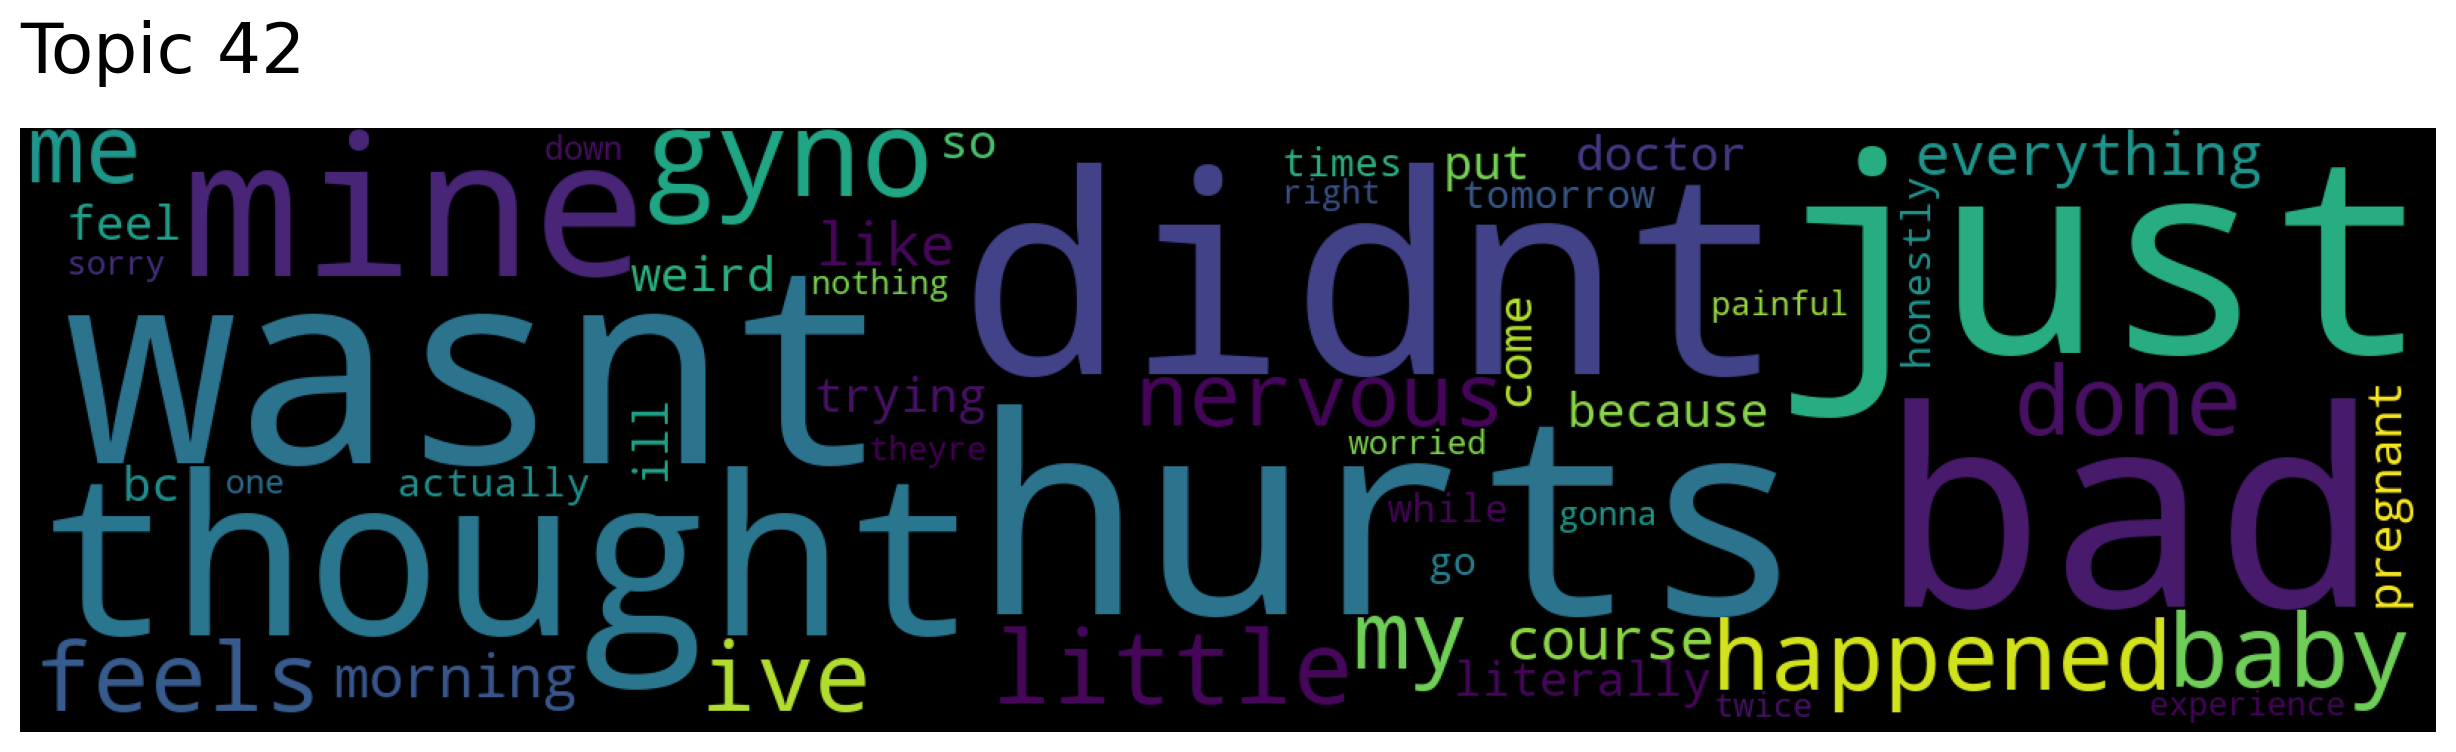

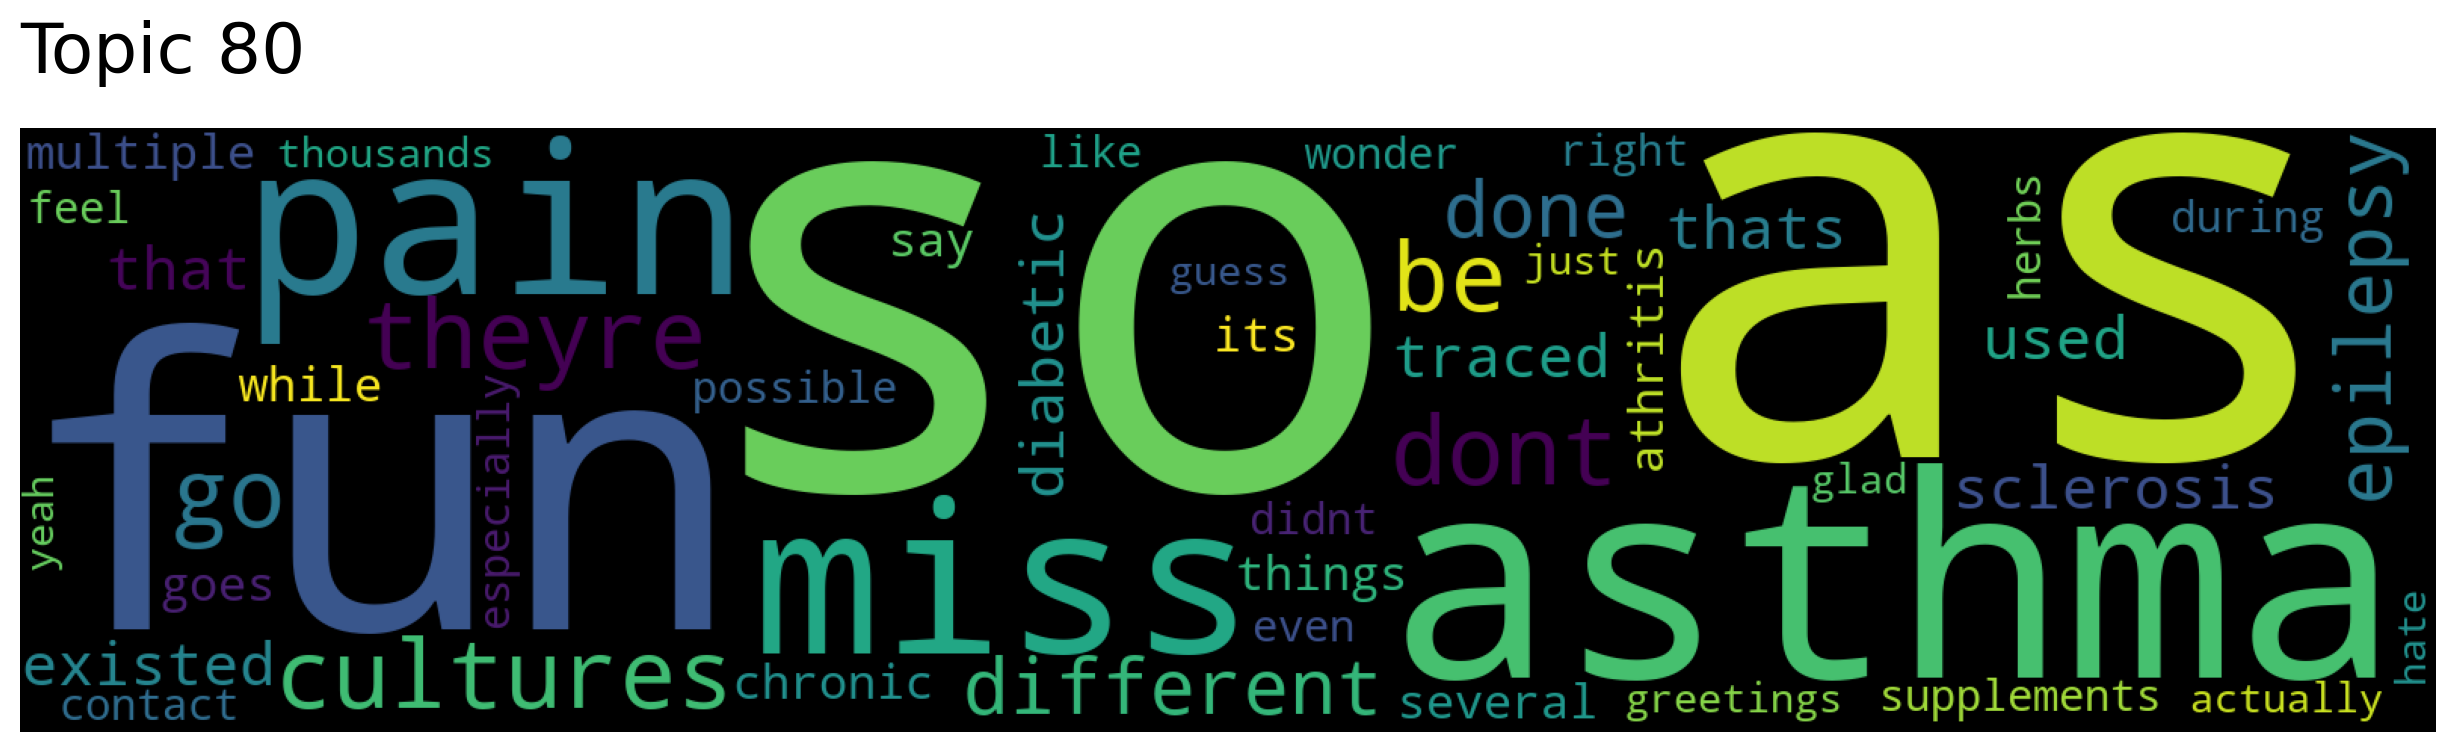

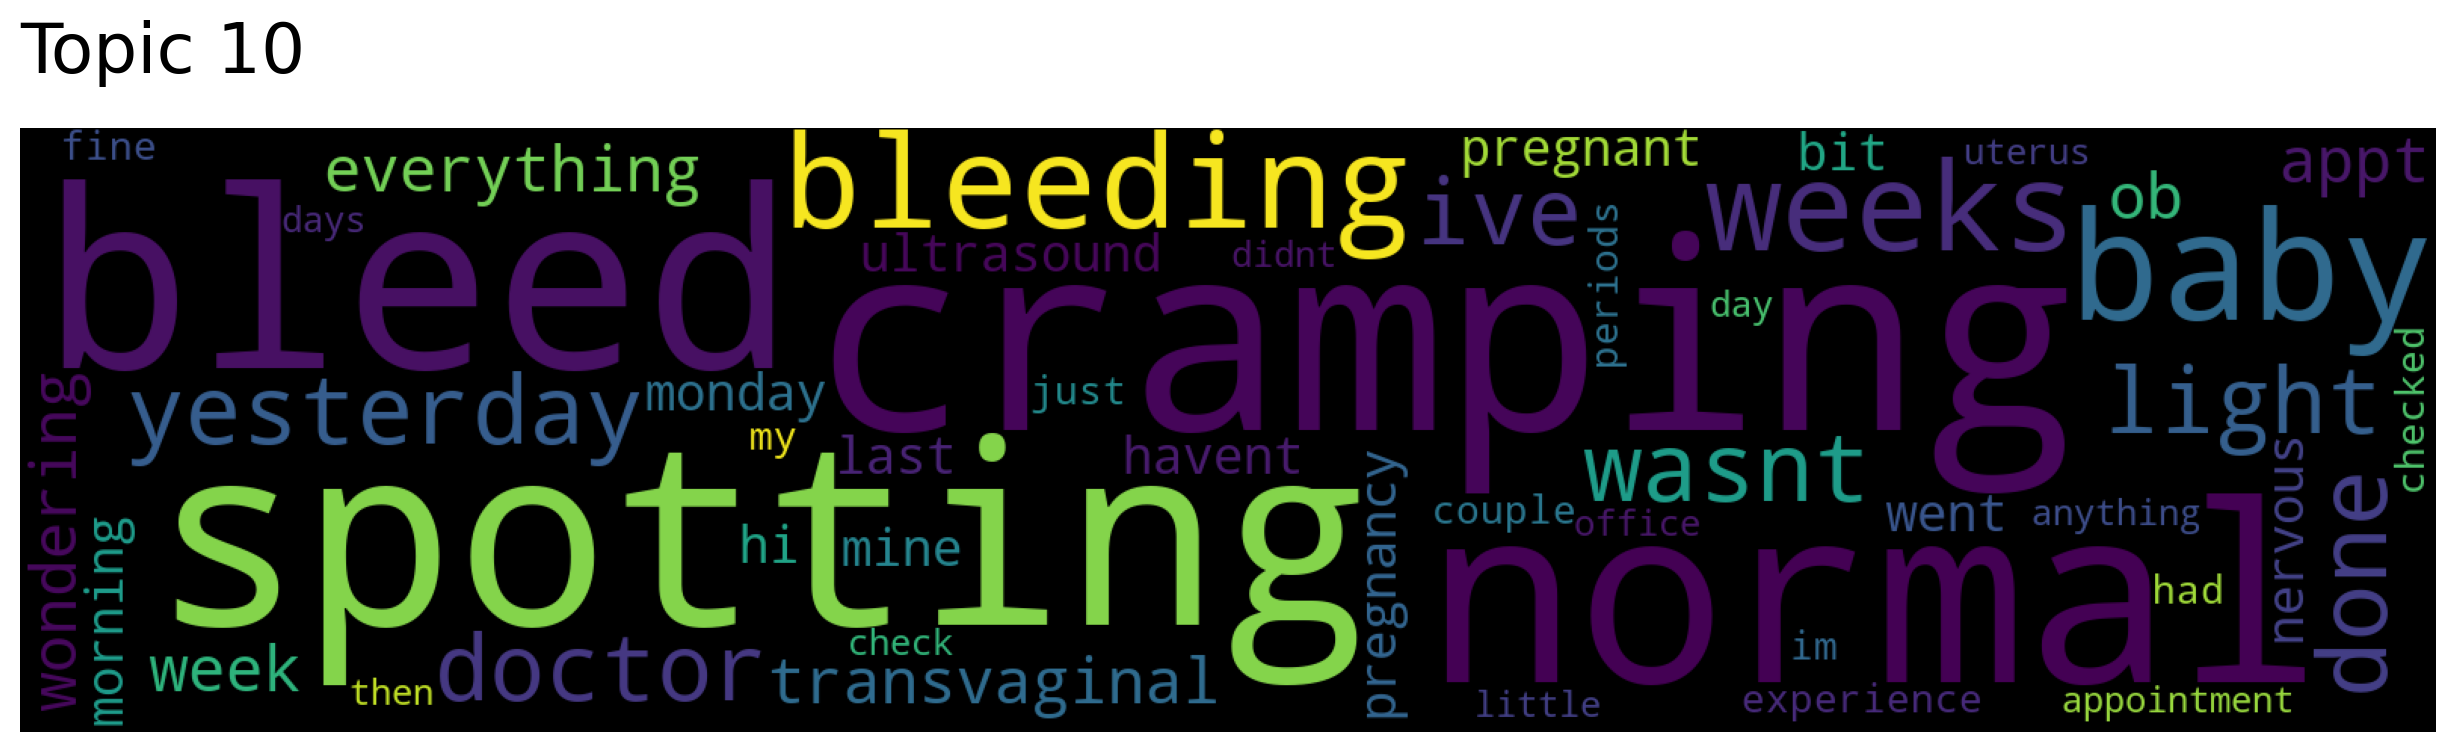

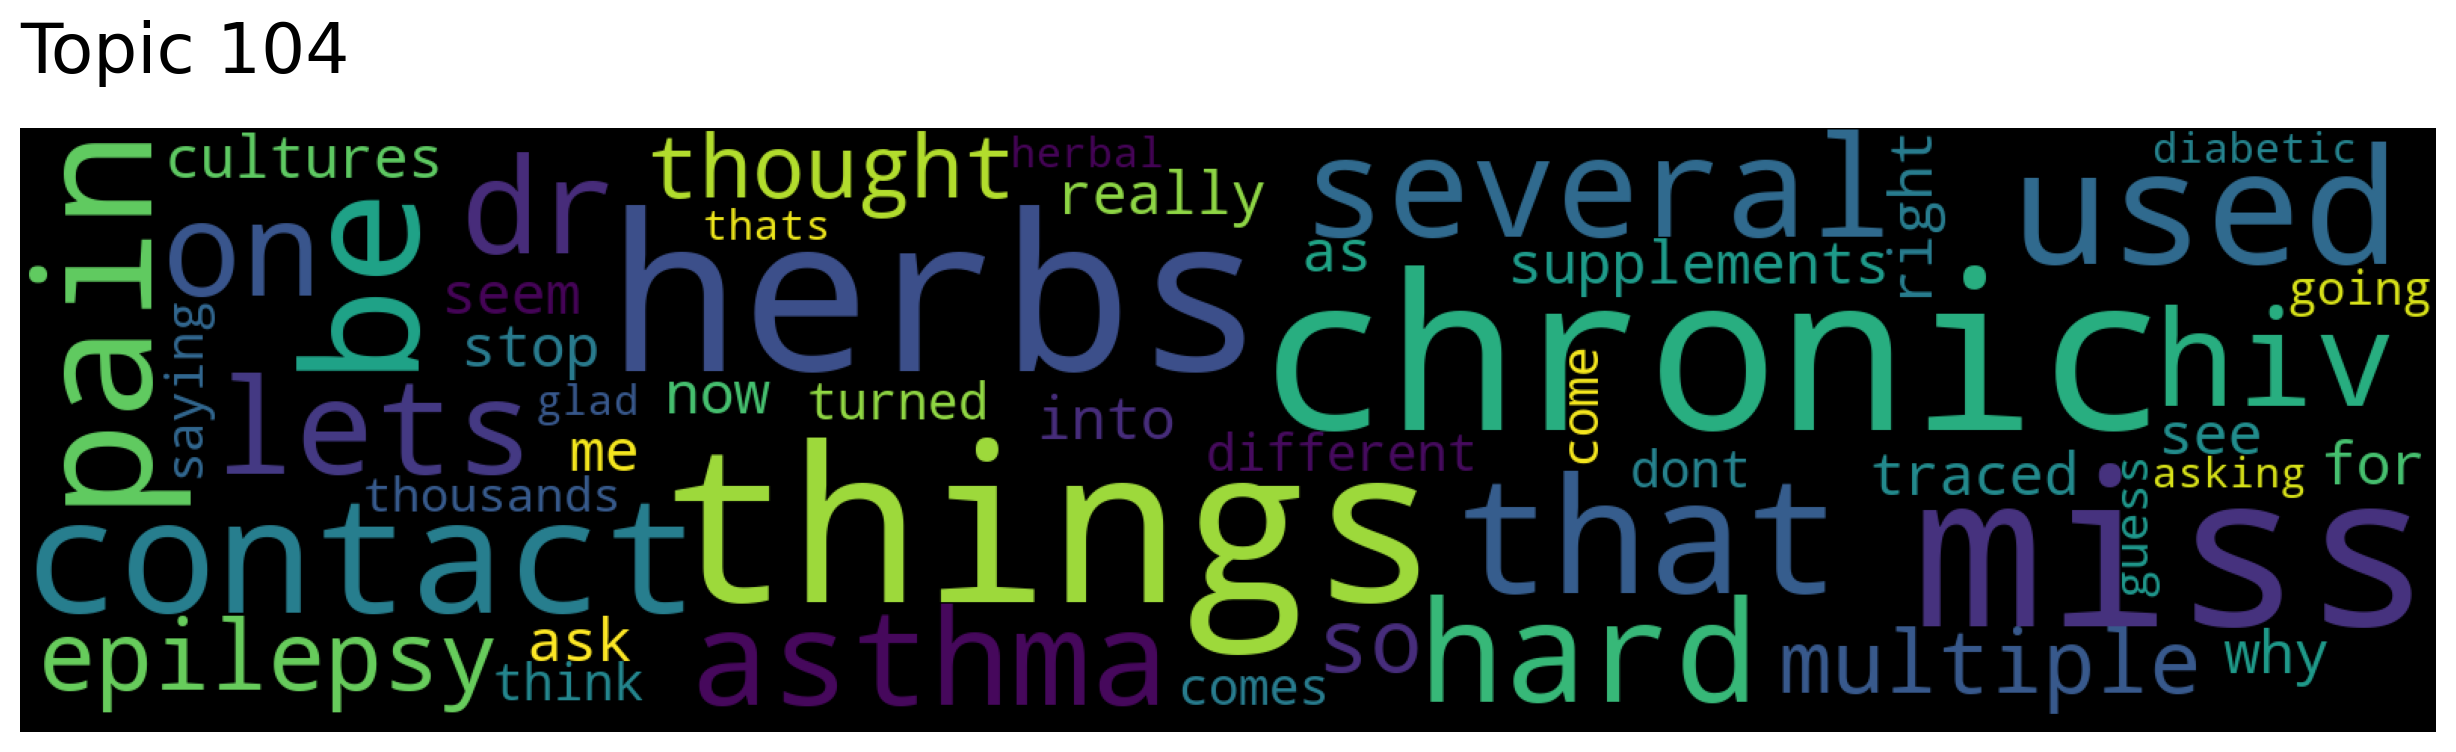

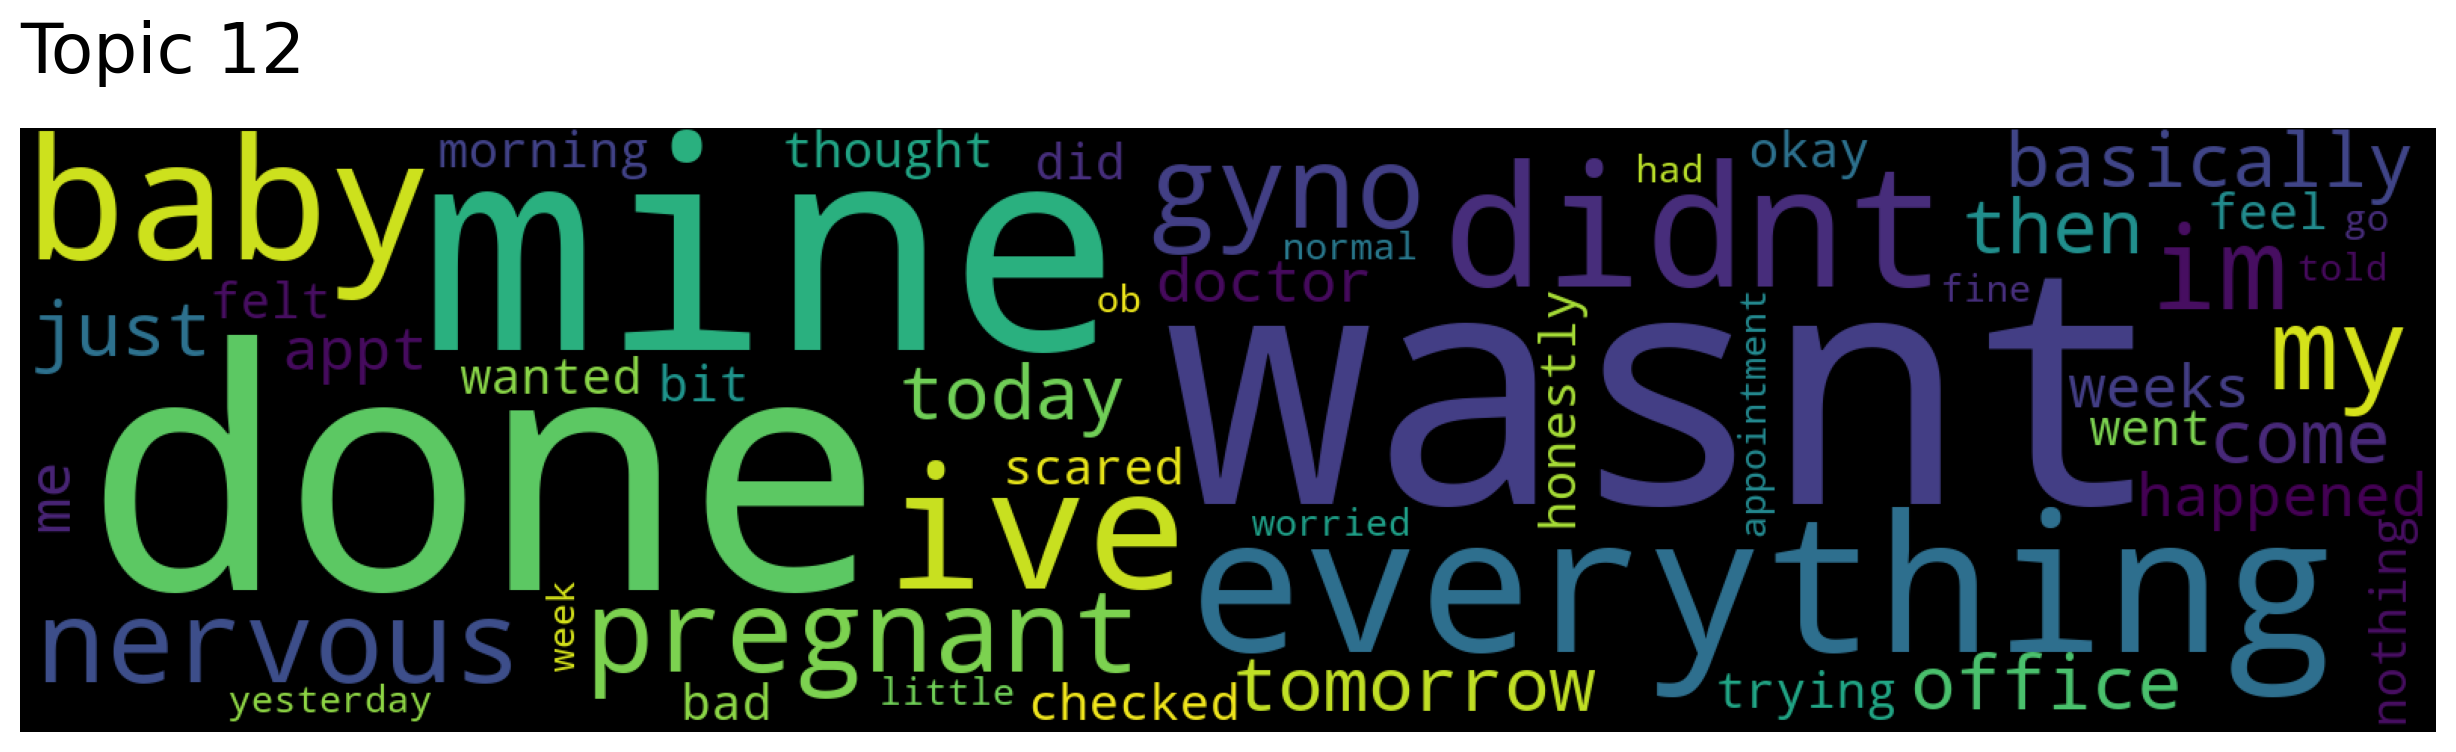

In [23]:
keywords_select_st = widgets.Label('Enter keywords seperated by space: ')
display(keywords_select_st)

keywords_input_st = widgets.Text()
display(keywords_input_st)

keywords_neg_select_st = widgets.Label('Enter negative keywords seperated by space: ')
display(keywords_neg_select_st)

keywords_neg_input_st = widgets.Text()
display(keywords_neg_input_st)

doc_num_select_st = widgets.Label('Choose number of topics: ')
display(doc_num_select_st)

doc_num_input_st = widgets.Text(value='5')
display(doc_num_input_st)

def display_similar_topics(*args):
    
    clear_output()
    display(keywords_select_st)
    display(keywords_input_st)
    display(keywords_neg_select_st)
    display(keywords_neg_input_st)
    display(doc_num_select_st)
    display(doc_num_input_st)
    display(keyword_btn_st)
    
    try:
        topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=keywords_input_st.value.split(),num_topics=int(doc_num_input_st.value), keywords_neg=keywords_neg_input_st.value.split())
        for topic in topic_nums:
            top2vec.generate_topic_wordcloud(topic, background_color="black")
        
    except Exception as e:
        print(e)
        
keyword_btn_st = widgets.Button(description="show topics")
display(keyword_btn_st)
keyword_btn_st.on_click(display_similar_topics)

# **Using KeyBert**

In [24]:
!pip install keybert[all]

     |████████████████████████████████| 78 kB 3.5 MB/s 
     |████████████████████████████████| 212 kB 11.2 MB/s 
     |████████████████████████████████| 51 kB 6.3 MB/s 
     |████████████████████████████████| 2.9 MB 37.5 MB/s 
     |████████████████████████████████| 3.3 MB 39.5 MB/s 
     |████████████████████████████████| 1.2 MB 42.2 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 596 kB 44.0 MB/s 
     |████████████████████████████████| 895 kB 53.1 MB/s 
  Created wheel for keybert: filename=keybert-0.5.0-py3-none-any.whl size=20491 sha256=0a7d3a8715963dfcf433806988bfc86dcd02bc7be4beb0b823e26ff0aaa7ec6a
  Stored in directory: /root/.cache/pip/wheels/99/1f/3f/590d2997adbb2d0e1f82e8ee05d42d6910e92c3ed283015ff8
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=dfcd6607ba0ad114ffe6edff62a775e5198263275cb2d5205094e7768e45a0ac
  Stored in directory: /root/.cache/pip/whee

In [25]:
# converting ;Cleaned_Text' column into list
a = list(data['Cleaned_Text'])
  
# converting list into string and then joining it with space
b = ' '.join(str(e) for e in a)

In [26]:
print(b[2000000:])

up sterilizing millions of african women use your money and media machine to cover seanhannity kayleighmcenany gopchairwoman i would rather have a pap smear by freddy krueger than watch your fucking show i think the only time i have had a call telling me everything is fine is from a pap smear and that was because i did not need to schedule a followup appointment unless something was wrong for pregnancy stuff they have always just waited until my next appointment to talk about my test results i also got my 2nd hpv booster because if my teenage sons are getting it i will too ive never had two days of pain from a pap smear usually just for a few hours afterwards maybe you should call your doctor and let them know just in case i have also never had any pain from a pap smear i second or third the idea that you should contact your doctor i have never had any pain after a pap smear it is a little uncomfortable but not painful even when i had a doctor who was hamfisted hopefully next time you 

In [27]:
from keybert import KeyBERT
kw_model = KeyBERT('distilbert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams['figure.dpi'] = 80

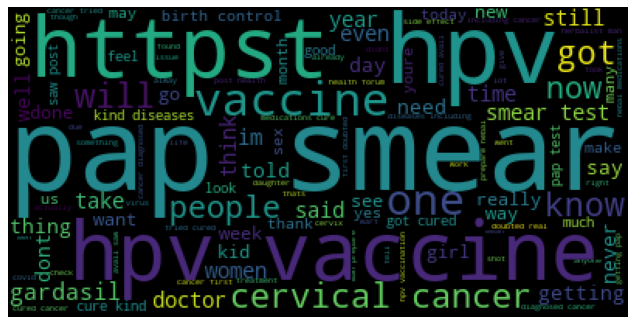

In [29]:
word_cloud = WordCloud(max_font_size=100).generate(b)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [30]:
# kw_model.extract_keywords(b, keyphrase_ngram_range=(3, 3), stop_words='english', 
#                               use_maxsum=True, nr_candidates=20, top_n=5)
# Not able to run this code snippet for refined results, due to less computational resources

In [31]:
kw_model.extract_keywords(b, keyphrase_ngram_range=(1, 4), stop_words="english")

[('women rare vaccinated hpv', 0.7227),
 ('hpv vaccine whoops women', 0.7037),
 ('girls vaccinated human papillomavirus', 0.7035),
 ('women vaccinated human papillomavirus', 0.6911),
 ('girls pass hpv vaccine', 0.688)]

In [32]:
kw_model.extract_keywords(b, keyphrase_ngram_range=(1, 3), stop_words="english")

[('girls hpv vaccine', 0.6349),
 ('girl hpv vaccine', 0.6263),
 ('girls vaccinated hpv', 0.6221),
 ('sisters vaccinated hpv', 0.6196),
 ('females hpv vaccines', 0.6189)]